# Wstęp do Uczenia Maszynowego - Projekt 2
## Etap: Pierwszy Kamień Milowy 
### Autorzy: Krzysztof Osiński, Jakub Miszczak

## Import pakietów

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
import zipfile

## Wczytanie zbioru danych

In [2]:
zip_path = "ecommerceDataset.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("ecommerceDataset.csv") as file:
        df = pd.read_csv(file, header=None)
        
df.columns = ['category', 'description'] 

In [3]:
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


## Eksploracyjna Analiza Danych (EDA)

In [5]:
X = df['description']
y = df['category']

In [10]:
print("Liczba brakujących opisów:", df['description'].isna().sum())

Liczba brakujących opisów: 1


In [11]:
df[df['description'].isna()]

,category,description,num_words,num_chars
39330,Clothing & Accessories,NaN,1,3


In [12]:
df = df.dropna(subset=['description'])

In [13]:
# Konwersja na string
df['description'] = df['description'].astype(str)

## Proporcja klas (etykiet)

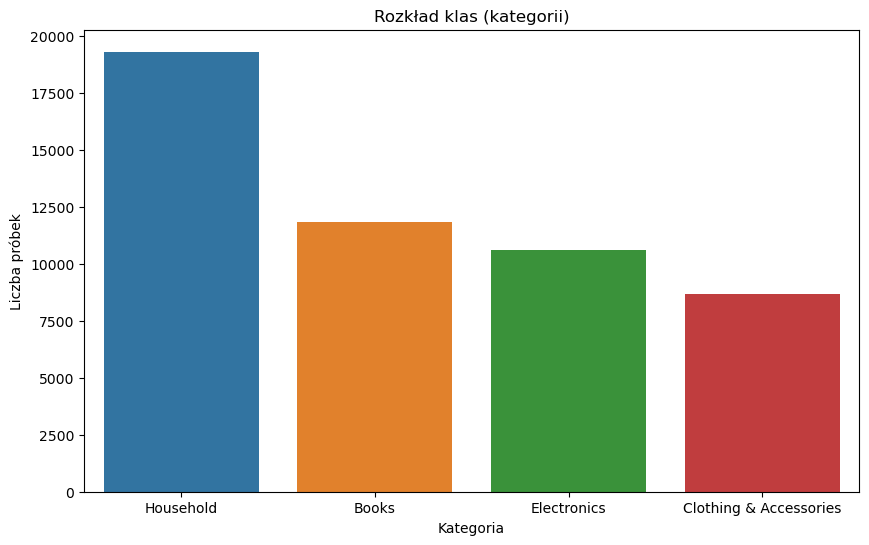

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Rozkład klas (kategorii)')
plt.ylabel('Liczba próbek')
plt.xlabel('Kategoria')
plt.show()

## Analiza długości tekstów (liczby słów i znaków)

array([[<Axes: title={'center': 'num_words'}>,
        <Axes: title={'center': 'num_chars'}>]], dtype=object)

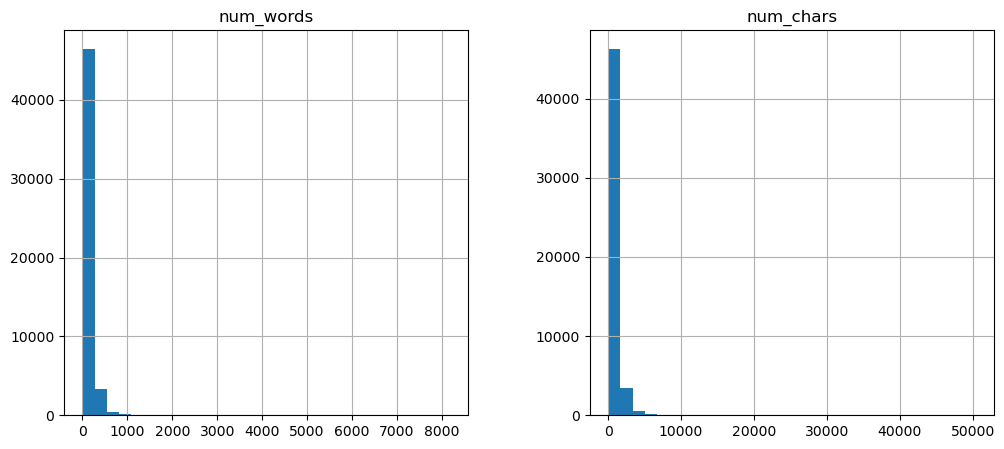

In [14]:
df['num_words'] = df['description'].apply(lambda x: len(str(x).split()))
df['num_chars'] = df['description'].apply(lambda x: len(str(x)))

# Histogram długości
df[['num_words', 'num_chars']].hist(bins=30, figsize=(12,5))


## Duplikaty opisów

In [31]:
# Unikalne opisy
print(f"Liczba unikalnych opisów: {df['description'].nunique()}")

Liczba unikalnych opisów: 27802


In [34]:
desc_counts = df['description'].value_counts()

duplicates_df = desc_counts[desc_counts > 1].reset_index()
duplicates_df.columns = ['description', 'count']

duplicates_df.head(10)

,description,count
0,Think & Grow Rich About the Author NAPOLEON HI...,30
1,The Power of Your Subconscious Mind: Unlock Yo...,29
2,HP 680 Original Ink Advantage Cartridge (Black...,26
3,Diverse Men's Formal Shirt Diverse is a wester...,23
4,Cubetek 2 in 1 Bluetooth Transmitter & Receive...,22
5,Philips BHS386 Kera Shine Straightener (Purple...,20
6,Littly Front Open Kids Thermal Top & Pyjama Se...,19
7,India Meets India Aum Cum Steel Tongue Happy D...,19
8,Omnimount -Oecms-Neoprene-Cable-Management Omn...,19
9,CBSE Chemistry Chapterwise Solved Papers Class...,19


## Krótkie opisy

In [30]:
# Krótkie opisy (mniej niż 5 słów)
short_descriptions = df[df['num_words'] < 5]
print(f"Znaleziono {short_descriptions.shape[0]} bardzo krótkich opisów.")

Znaleziono 986 bardzo krótkich opisów.


In [35]:
short_descriptions.head()

,category,description,num_words,num_chars,avg_word_length,unique_words
832,Household,Quechua Arpenaz 50 Hammock,4,26,7.000000,4
848,Household,Quechua Arpenaz 50 Hammock,4,26,7.000000,4
1365,Household,Ebee Multipurpose Rack (Blue),4,29,6.666667,4
1373,Household,Ebee Multipurpose Rack (Blue),4,29,6.666667,4
2205,Household,Tulip Recliner Chair (Black),4,28,6.000000,4


## Analiza najczęściej występujących słów

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


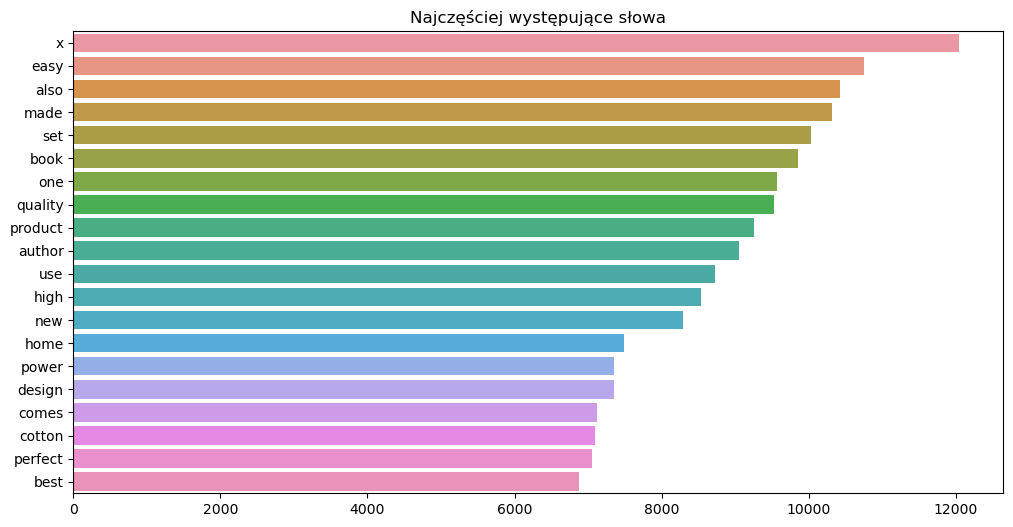

In [15]:
from collections import Counter
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Łączenie wszystkich opisów w jeden tekst
all_words = ' '.join(df['description']).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)

# Wykres
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Najczęściej występujące słowa')
plt.show()


## Chmura słów

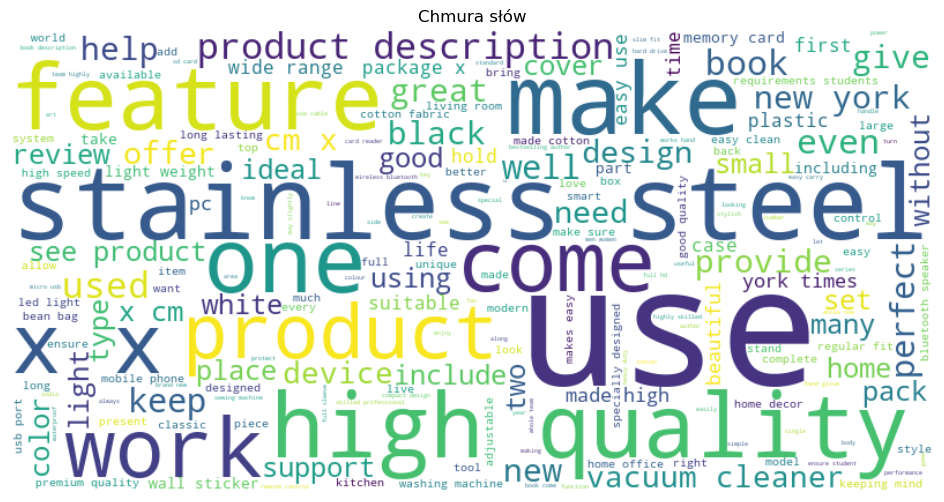

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura słów')
plt.show()


## TF-IDF (Term Frequency – Inverse Document Frequency)
TF-IDF to miara, która ocenia jak ważne jest dane słowo w konkretnym dokumencie, uwzględniając to, jak często występuje w całym zbiorze dokumentów.
TF-IDF podkreśla słowa charakterystyczne dla danego dokumentu, ignorując słowa bardzo ogólne (np. "the", "is", "product").


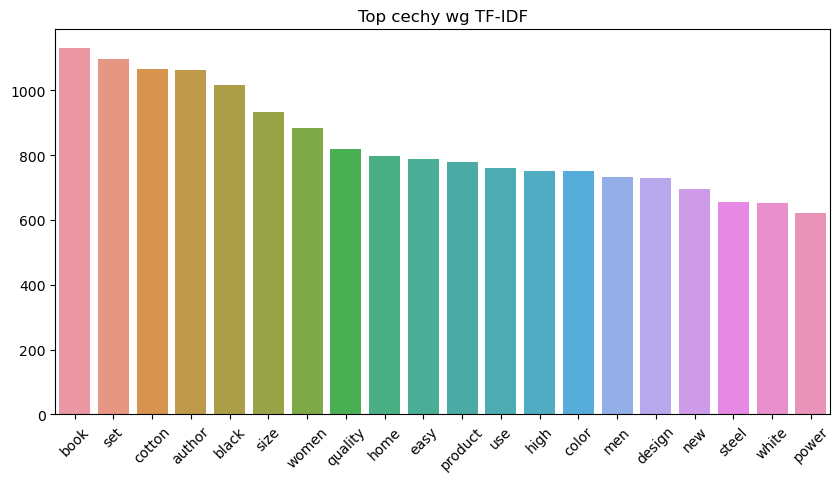

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigramy i bigramy
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(df['description'])

# Najważniejsze cechy wg tf-idf
feature_array = tfidf.get_feature_names_out()
tfidf_sorting = X_tfidf.toarray().sum(axis=0).argsort()[::-1]
top_n = 20
top_features = feature_array[tfidf_sorting][:top_n]

# Wykres
plt.figure(figsize=(10,5))
sns.barplot(x=top_features, y=X_tfidf.toarray().sum(axis=0)[tfidf_sorting][:top_n])
plt.xticks(rotation=45)
plt.title('Top cechy wg TF-IDF')
plt.show()


## n-gramy (np. unigramy, bigramy)
Ciągi kolejnych słów w tekście.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizer: bigramy i trigramy, bez stop words
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['description'])

# Sumujemy wystąpienia
ngrams_freq = X.sum(axis=0)
ngrams = [(word, ngrams_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngrams_sorted = sorted(ngrams, key=lambda x: x[1], reverse=True)


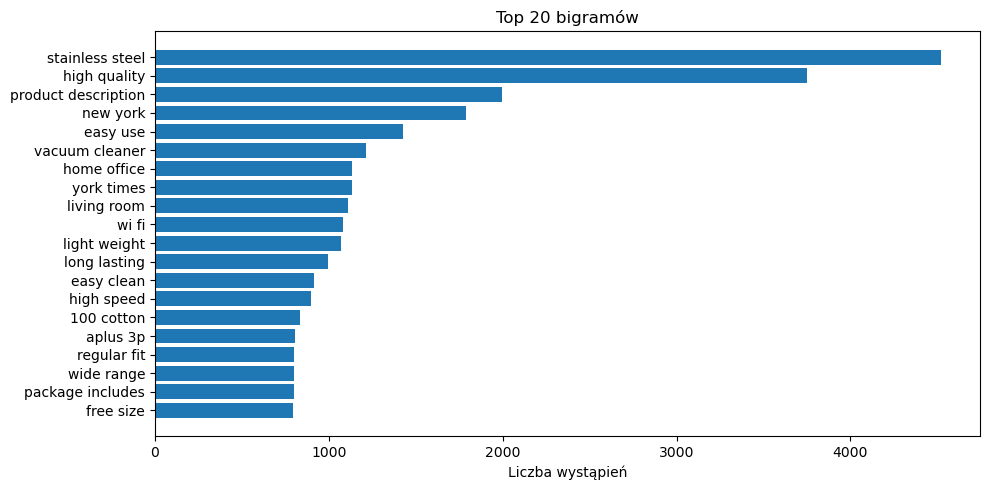

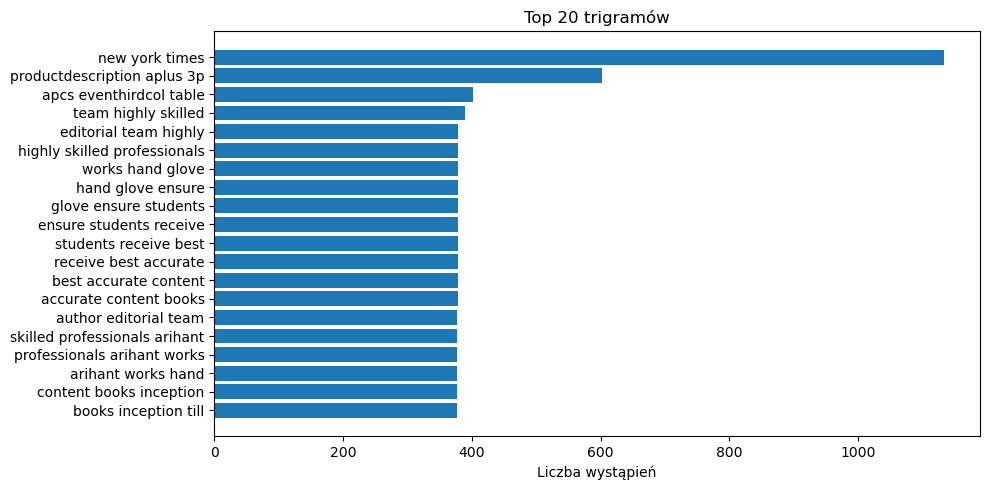

In [27]:
import matplotlib.pyplot as plt

# Oddzielnie bigramy i trigramy
bigrams = [x for x in ngrams_sorted if len(x[0].split()) == 2][:20]
trigrams = [x for x in ngrams_sorted if len(x[0].split()) == 3][:20]

# Wykres
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10,5))
    plt.barh(words[::-1], counts[::-1])  # odwróć do góry nogami
    plt.title(title)
    plt.xlabel('Liczba wystąpień')
    plt.tight_layout()
    plt.show()

plot_ngrams(bigrams, 'Top 20 bigramów')
plot_ngrams(trigrams, 'Top 20 trigramów')


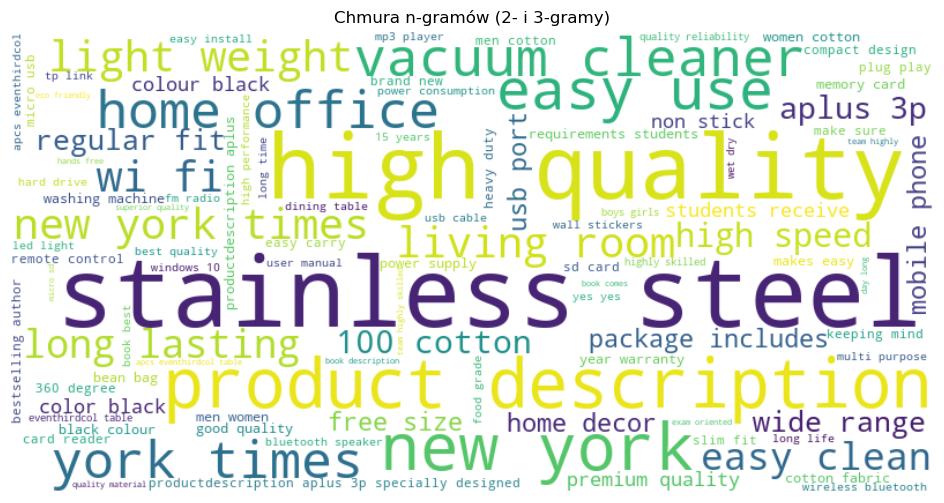

In [28]:
# Przygotuj słownik: {ngram: count}
ngram_dict = dict(ngrams_sorted[:100])  # ogranicz do top 100

# Tworzenie chmury
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_dict)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura n-gramów (2- i 3-gramy)')
plt.show()


## Stemming i lematyzacja

In [22]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Przykładowe zdanie
text = "He studies better and played games while studying different topics."
tokens = word_tokenize(text.lower())
words = [w for w in tokens if w.isalpha()]  # filtracja: tylko słowa

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Zastosowanie
stemmed = [stemmer.stem(w) for w in words]
lemmatized = [lemmatizer.lemmatize(w) for w in words]

# Tworzenie tabeli porównawczej
df_compare = pd.DataFrame({
    'Original': words,
    'Stemmed': stemmed,
    'Lemmatized': lemmatized
})

df_compare


,Original,Stemmed,Lemmatized
0,he,he,he
1,studies,studi,study
2,better,better,better
3,and,and,and
4,played,play,played
5,games,game,game
6,while,while,while
7,studying,studi,studying
8,different,differ,different
9,topics,topic,topic


## Złożoność tekstów (średnia długość słów, liczba unikalnych słów)

array([[<Axes: title={'center': 'avg_word_length'}>,
        <Axes: title={'center': 'unique_words'}>]], dtype=object)

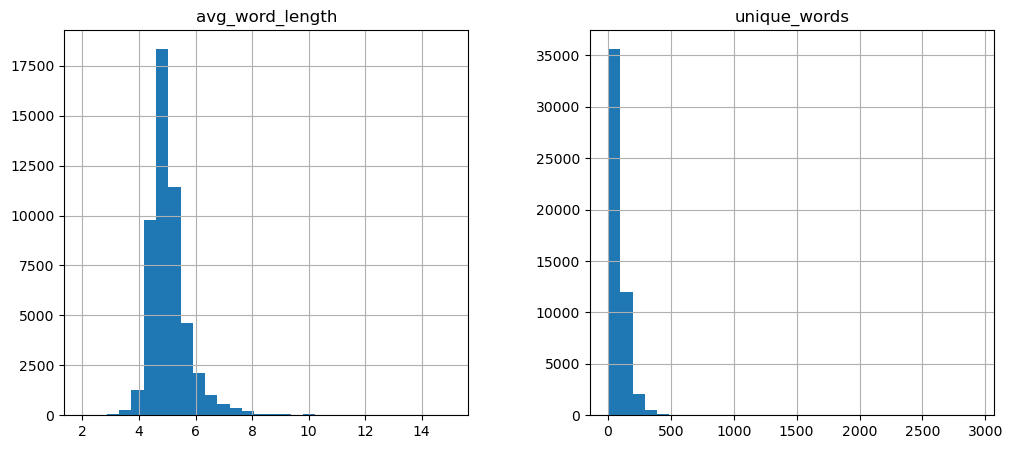

In [23]:
df['avg_word_length'] = df['description'].apply(lambda x: np.mean([len(word) for word in str(x).split() if word.isalpha()]))
df['unique_words'] = df['description'].apply(lambda x: len(set(str(x).split())))

df[['avg_word_length', 'unique_words']].hist(bins=30, figsize=(12,5))


## Analiza sentymentu

Rozkład sentymentu:
count    50424.000000
mean         0.175824
std          0.168982
min         -0.800000
25%          0.045455
50%          0.179054
75%          0.279945
max          1.000000
Name: sentiment, dtype: float64


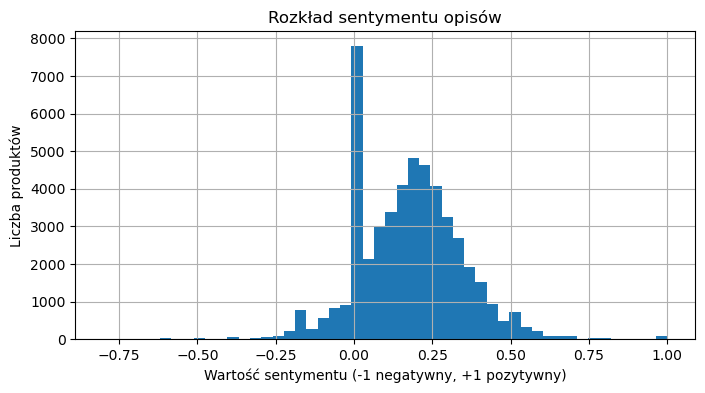

In [38]:
from textblob import TextBlob

df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Rozkład sentymentu:")
print(df['sentiment'].describe())

import matplotlib.pyplot as plt
df['sentiment'].hist(bins=50, figsize=(8,4))
plt.title('Rozkład sentymentu opisów')
plt.xlabel('Wartość sentymentu (-1 negatywny, +1 pozytywny)')
plt.ylabel('Liczba produktów')
plt.show()


## Korelacja słów z kategoriami

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Funkcja top N słów w danej kategorii
def top_words_by_category(df, category_col, text_col, top_n=10):
    result = {}
    categories = df[category_col].unique()
    
    for cat in categories:
        texts = df[df[category_col] == cat][text_col]
        vec = CountVectorizer(stop_words='english')
        X = vec.fit_transform(texts)
        total = X.sum(axis=0)
        freq = [(word, total[0, idx]) for word, idx in vec.vocabulary_.items()]
        sorted_freq = sorted(freq, key=lambda x: x[1], reverse=True)[:top_n]
        result[cat] = sorted_freq
    return result


top_words = top_words_by_category(df, 'category', 'description')

for cat, words in top_words.items():
    print(f"\n📂 Kategoria: {cat}")
    for word, count in words:
        print(f"{word}: {count}")



📂 Kategoria: Household
home: 8060
set: 8047
use: 7673
easy: 7414
steel: 6006
size: 5961
quality: 5924
color: 5648
product: 5518
water: 5321

📂 Kategoria: Books
book: 11921
author: 9776
books: 4859
new: 4819
world: 3902
review: 3739
life: 3335
university: 2945
years: 2812
best: 2804

📂 Kategoria: Clothing & Accessories
cotton: 5632
women: 5344
men: 4118
size: 4071
wear: 3981
fit: 3176
fabric: 2939
look: 2663
set: 2494
soft: 2247

📂 Kategoria: Electronics
usb: 7225
black: 5036
bluetooth: 4708
power: 4500
camera: 4492
high: 4478
wireless: 4419
audio: 4389
cable: 4124
sound: 3406


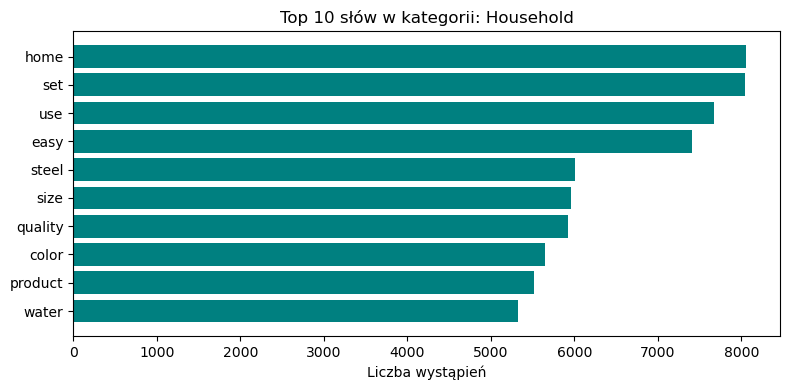

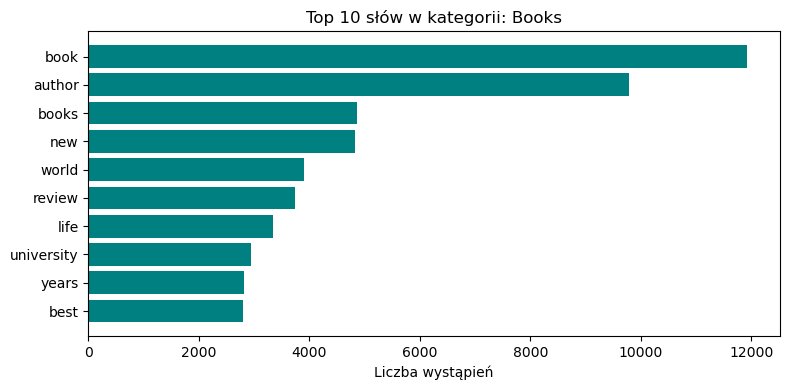

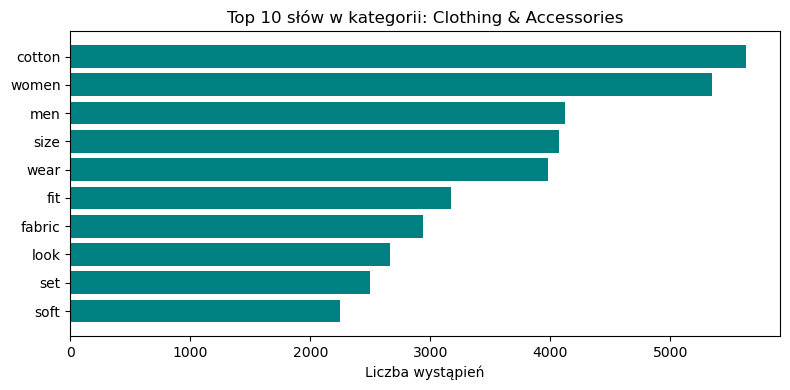

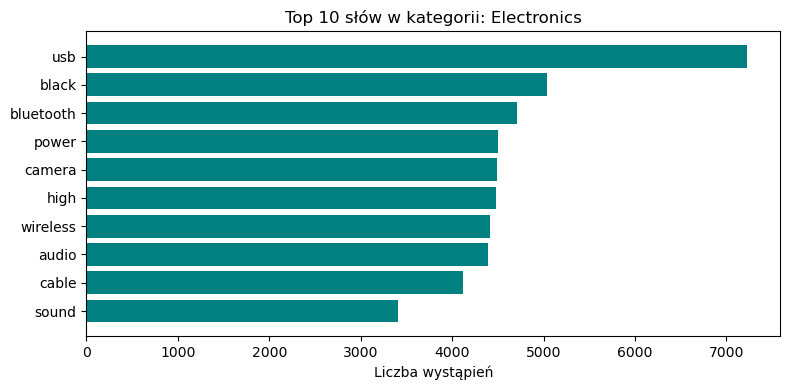

In [41]:
# Funkcja do wizualizacji top N słów w kategorii
def plot_top_words_per_category(top_words_dict, top_n=10):
    for category, words in top_words_dict.items():
        # Ogranicz do top_n
        words = words[:top_n]
        terms, counts = zip(*words)

        plt.figure(figsize=(8, 4))
        plt.barh(terms[::-1], counts[::-1], color='teal')
        plt.title(f"Top {top_n} słów w kategorii: {category}")
        plt.xlabel("Liczba wystąpień")
        plt.tight_layout()
        plt.show()

plot_top_words_per_category(top_words)
